In [2]:
import numpy as np
import matplotlib.pyplot as plt



plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        # "font.sans-serif": ["Helvetica"]
    }
)



<ipython-input-4-afd72d4ed239>:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cf = ax.pcolormesh(X, T, Z, cmap=plt.get_cmap("inferno"))


Text(0, 0.5, '$t$')

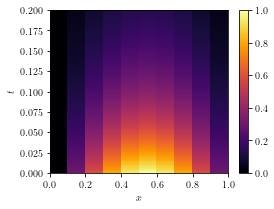

In [4]:
# Explicit scheme for solving the heat equation, given our B.C.s and I.V.s

#def explicit_FD_heat_equation(dx,dt,t_final):
tn = 0.2
dt = 0.001
dx = 0.1
x = np.linspace(0, 1, int(1/dx)+1)
t = np.linspace(0, tn, int(tn/dt)+1)
delta = dt/dx**2

solution = np.zeros((len(t),len(x))) #each timestep is on one row, since python is row-major should speed up
                                     # the matrix@ vector operation in the time-stepping due to caching.
solution[0,:] = np.sin(np.pi*x)
solution[0,-1] = 0 #Getting rid of a machine epsilon, per B.C should be identically zero.

#setup scheme matrix, should be scipy routines for faster (sparse) handling of this
scheme_matrix = np.zeros((len(x),len(x)))
building_block = np.asarray([delta, 1-2*delta, delta]) # central-difference in space, forward-euler in time.
for i in range(1,len(x)-1): #Note the zero-padding for top and bottom row, to comply with B.C
    scheme_matrix[i,i-1:i+2] = building_block # Tridiagonal matrix apart from top and bottom row.


for i in range(len(t)-1):
    solution[i+1,:] = scheme_matrix @ solution[i,:] #Numpy should interpret solution as shape (N,1) during computation
    

X, T = np.meshgrid(x, t)
Z = solution

fig, ax = plt.subplots(figsize=(4, 3))
cf = ax.pcolormesh(X, T, Z, cmap=plt.get_cmap("inferno"))
fig.colorbar(cf, ax=ax)
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")

In [15]:
Z.shape

(1001, 11)

<ipython-input-5-d7940b44571c>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cf = ax.pcolormesh(X, T, Z, cmap=plt.get_cmap("inferno"))


Text(0, 0.5, '$t$')

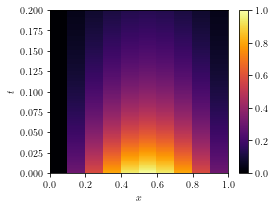

In [5]:
# Copied from analytic notebook. Added endpoint to linspace and pi**2 to exp in analytic solution.

def u(x, t):
    return np.sin(np.pi * x) * np.exp(- np.pi**2 * t)

tn = 0.2
dx = 0.1
dt = 0.001

x = np.linspace(0, 1, int(1 / dx)+1)
t = np.linspace(0, tn, int(tn / dt)+1)

X, T = np.meshgrid(x, t)
Z = u(X, T)

fig, ax = plt.subplots(figsize=(4, 3))
cf = ax.pcolormesh(X, T, Z, cmap=plt.get_cmap("inferno"))
fig.colorbar(cf, ax=ax)
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")

In [17]:
Z.shape

(1001, 11)